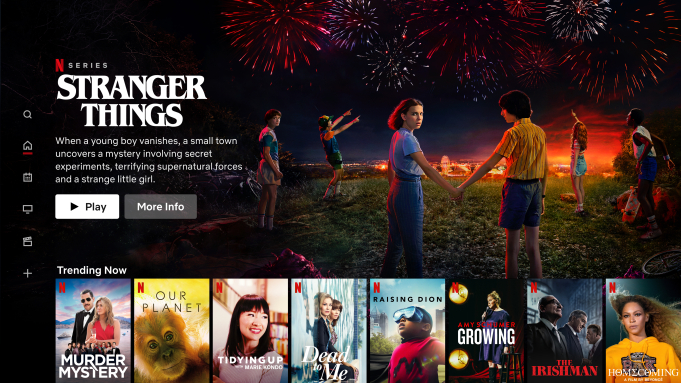

In [1]:
from IPython.display import Image
url = 'netflix.jpg'
Image(url,width=900, height=10)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True) 
import missingno
import plotly.express as px
from plotly.subplots import make_subplots

In [3]:
df = pd.read_csv('netflix_titles.csv.xls')

In [4]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [6]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

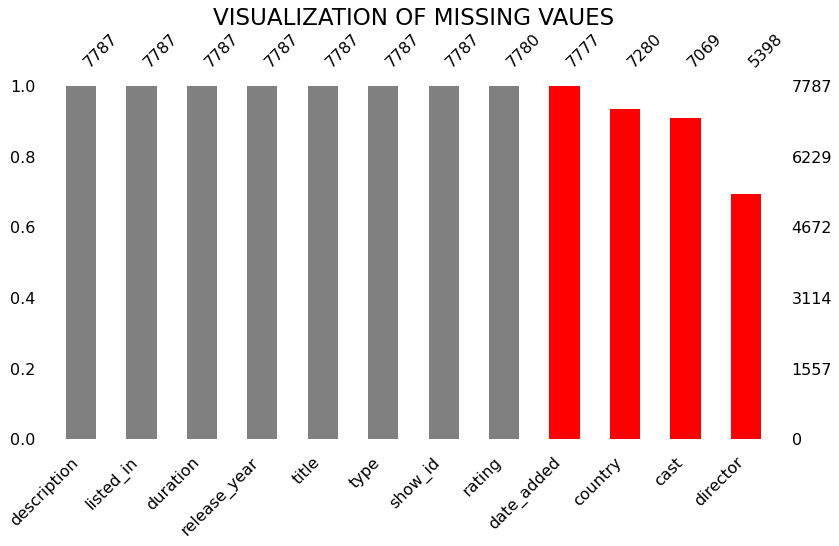

In [7]:
sns.set_context("poster")
color = ['grey','grey','grey','grey','grey','grey','grey','grey','red','red','red','red']
missingno.bar(df,fontsize =16, color = color, sort = 'descending', figsize = (13,6.5))
plt.title("VISUALIZATION OF MISSING VAUES",fontsize=23)
plt.show()

In [8]:
#Cleansing Data

In [9]:
df['director'] = df['director'].fillna('NoDataAvailable')
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['cast'] = df['cast'].fillna('NoDataAvailable')
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df['genre'] = df['listed_in'].apply(lambda x: x.split(',')[0])
df['date_added'] = pd.to_datetime(df['date_added'])
df['weekday_added'] = df['date_added'].apply(lambda x: x.dayofweek)
d = {0 : 'Monday', 1 : 'Tuesday', 2 : 'Wednesday', 3 : 'Thursday', 4 : 'Friday', 5 : 'Saturday', 6 : 'Sunday'}
df['weekday_added']=df['weekday_added'].map(d)
df['month_added'] = df['date_added'].apply(lambda x: x.month)
c = {1 : 'January', 2 : 'February', 3 : 'March', 4 : 'April', 5 : 'May', 6 : 'June', 
     7 : 'July', 8 : 'August', 9: 'September', 10 : 'October', 11 : 'November', 12 : 'December'}
df['month_added']=df['month_added'].map(c)
print('count of values')
print(df.isna().sum())

count of values
show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added       0
release_year     0
rating           0
duration         0
listed_in        0
description      0
genre            0
weekday_added    0
month_added      0
dtype: int64


In [10]:
#EDA

In [11]:
label= ["Movies","Tv Shows"]
fig = px.pie(labels=label,values=df['type'].value_counts(), names = label,width = 900, height = 650)
fig.update_traces(textposition = 'inside', 
                  textinfo = 'percent + label', 
                  hole = 0.8, 
                  marker = dict(colors = ['#ff6361','#1e434c','#ffa600'], line = dict(color = 'white', width = 2)))

fig.update_layout(annotations = [dict(text = 'Content Type', 
                                      x = 0.5, y = 0.5, font_size = 48, showarrow = False, 
                                      font_family = 'monospace',
                                      font_color = 'black')],
                  showlegend = False)

In [12]:
#Country Analysis

Text(0.5, 1.0, 'Top Countries With Highest Number Of Movies And TV-Shows')

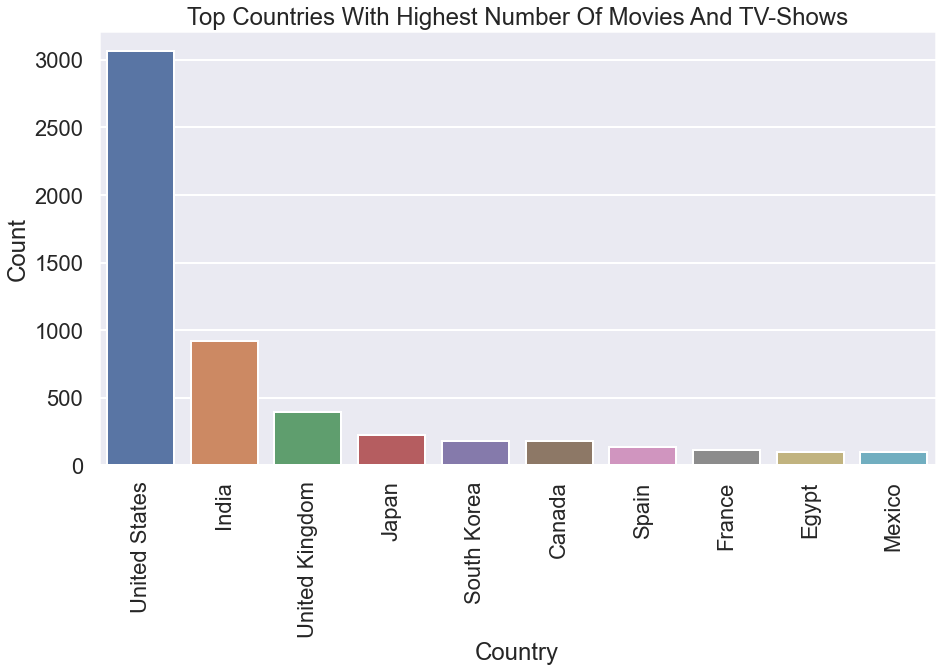

In [13]:
B = df['country'].value_counts()[:10]
B = B.reset_index()
B.columns = ['Country','Count']
sns.set_style('darkgrid')
plt.figure(figsize=(15,8))
sns.barplot(x='Country',y='Count',data=B,palette="deep")
plt.xticks(rotation='vertical')
plt.title("Top Countries With Highest Number Of Movies And TV-Shows")

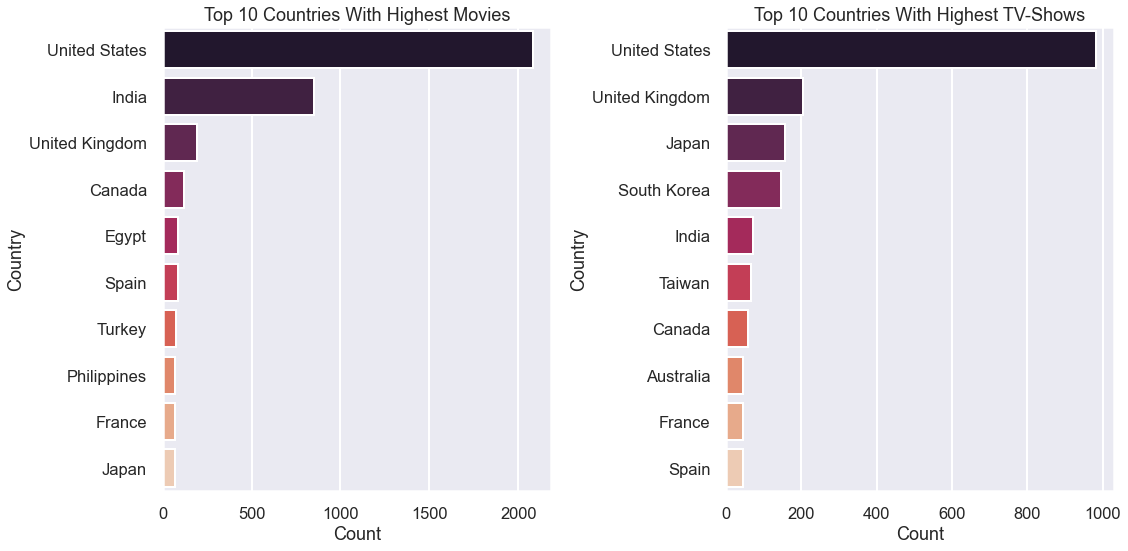

In [14]:
plt.figure(figsize=(16,8))
sns.set_context("poster", font_scale = .75)
sns.set_style('darkgrid')
A = df[df['type']=='Movie']['country'].value_counts()[:10]
A = A.reset_index()
A.columns=['Country','Count']
B = df[df['type']=='TV Show']['country'].value_counts()[:10]
B = B.reset_index()
B.columns=['Country','Count']


plt.subplot(121)
sns.barplot(y='Country',x='Count',data=A,palette="rocket")
plt.title('Top 10 Countries With Highest Movies')
plt.subplot(122)
sns.barplot(y='Country',x='Count',data=B,palette="rocket")
plt.title('Top 10 Countries With Highest TV-Shows')
plt.tight_layout()

In [15]:
A = df[df['type']=='Movie']['genre'].value_counts()
A = A.reset_index()
A.columns=['Genre','Count']
B = df[df['type']=='TV Show']['genre'].value_counts()
B = B.reset_index()
B.columns=['Genre','Count']

fig = make_subplots(rows=2,cols=1,subplot_titles=('Number movies by genre', 'Number TV shows by genre'))

fig.add_trace(go.Bar(x=A['Genre'],y=A['Count'],marker=dict(color=A['Count'],colorscale='bluered')),row=1,col=1)

fig.add_trace(go.Bar(x=B['Genre'],y=B['Count'],marker=dict(color=B['Count'],colorscale='bluered')),row=2,col=1)

fig.update_yaxes(mirror=True)
fig.update_layout(title=dict(text='Genres by movies and tv shows',x=0.5,font=dict(size=20, color='black')),height=800,
showlegend=False)
fig.show()

In [16]:
B = df[df['type']=='Movie']['rating'].value_counts()
B = B.reset_index()
B.columns=['rating','Count']
C = df[df['type']=='TV Show']['genre'].value_counts()
C = C.reset_index()
C.columns=['rating','Count']

plt.figure(figsize=(18,6.5))
fig = make_subplots(rows=1,cols=2,subplot_titles=('Number movies by Rating', 'Number TV shows by Rating'))
sns.set_style('whitegrid')

fig.add_trace(
    go.Bar(x=B['rating'],y=B['Count'],marker=dict(color=B['Count'])),row=1,col=1)

fig.add_trace(go.Bar(x=C['rating'],y=C['Count'],marker=dict(color=B['Count'])),row=1,col=2)
fig.update_yaxes(mirror=True)
fig.update_layout(title=dict(text='Ratings by Movies and TV Shows',x=0.5,font=dict(size=20, color='black')),height=800,
                  showlegend=False)
fig.show()

<Figure size 1296x468 with 0 Axes>

In [17]:
#Year Wise Content

TypeError: cannot astype a datetimelike from [datetime64[ns]] to [float64]

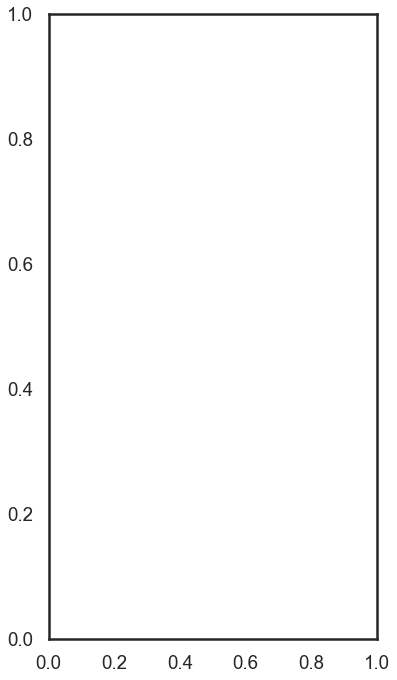

In [18]:
plt.figure(figsize=(20,11.5))
sns.set_style('white')
sns.set_context("poster", font_scale = .85)
plt.subplot(1,3,1)
a = sns.kdeplot(x='release_year',data=df,hue='type',fill=True,palette=["#ff6361","#ffa600"],alpha=0.9)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Content Added Over The Years')
a.set_xlim([1960,2025])
plt.grid()
hspace=0.9
plt.subplot(1,3,2)
b=sns.kdeplot(x='release_year',data=df[df['type']=='TV Show'],fill=True,color="#ffa600",alpha=0.9)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Movies Added Over The Years')
b.set_xlim([1960,2025])
plt.grid()
plt.subplot(1,3,3)
b = sns.kdeplot(x='release_year',data=df[df['type']=='TV Show'],fill=True,color="#ff6361",alpha=0.9)
b.set_xlim([1960,2025])
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('TV Shows Added Over The Years')
plt.grid()
plt.suptitle('Year Wise Conent')
plt.tight_layout()
plt.show()

In [20]:
R = df[df['type']=='Movie']['weekday_added'].value_counts()
S = df[df['type']=='TV Show']['weekday_added'].value_counts()
label1 = ['Friday','Thursday','Tuesday','Wednesday','Monday','Saturday','Sunday']
label2 = ['Friday','Wednesday','Thursday','Tuesday','Saturday','Monday','Sunday']
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=R),
              1, 1)
fig.add_trace(go.Pie(labels=label2,values=S),
              1, 2)
# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.55, hoverinfo="label+value+name",marker = dict(colors=['#8d230f','#ff6361','#ffa600','#bc5090'], line = dict(color = 'white', width = 2)))
fig.update_layout(
    title=dict(
        text='Movies and TV shows by weekday added',
        x=0.5,
        font=dict(
            size=30, 
            color='black')),
    
# Add annotations in the center of the donut pies.
annotations=[dict(text='TV Show', x=0.86, y=0.5, font_size=28, showarrow=False),
                 dict(text='Movie', x=0.17, y=0.5, font_size=28, showarrow=False)])
fig.show()

In [19]:
month_df_movies = df[df['type']=='Movie']['month_added'].value_counts().to_frame()
month_df_movies.reset_index(inplace=True)
month_df_movies.rename(columns={'index':'Month', 'month_added':'Count'}, inplace=True)

# month tv shows
month_df_tv_shows = df[df['type']=='TV Show']['month_added'].value_counts().to_frame()
month_df_tv_shows.reset_index(inplace=True)
month_df_tv_shows.rename(columns={'index':'Month', 'month_added':'Count'}, inplace=True)

sns.set_style('darkgrid')
fig = make_subplots(rows=1,cols=2, specs=[[{'type': 'xy'}, {'type': 'xy'}]],subplot_titles=('Movies', 'TV Shows'))

fig.add_trace(
go.Funnel(y=month_df_movies['Month'],x=month_df_movies['Count'], marker=dict( color='blue'),showlegend=False),row=1,col=1)
fig.add_trace(
go.Funnel(y=month_df_tv_shows['Month'],x=month_df_tv_shows['Count'], marker=dict( color='red'),showlegend=False),row=1,
col=2)
fig.update_layout(title=dict(text='Number of movies and TV Shows by month added',x=0.5,font=dict(size=20, color='black')))
fig.show()

In [26]:
#'Last 6 years trends in Netflix by USA'

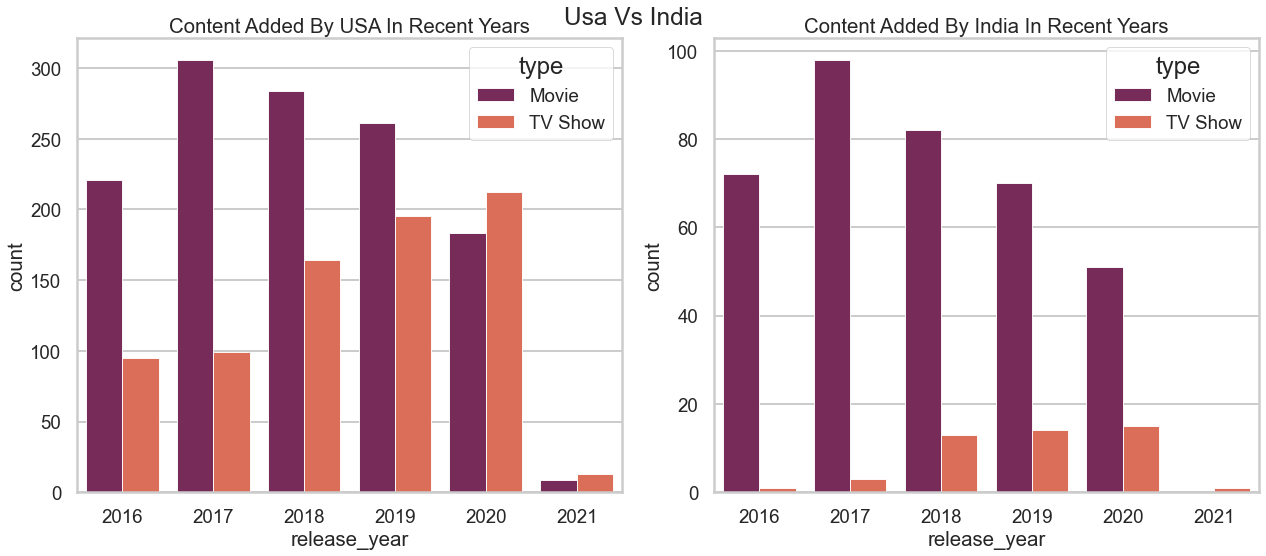

In [27]:
sns.set_style('whitegrid')
sns.set_context("poster", font_scale = .85)
sns.set_context(rc = {'patch.linewidth': 0.9})
plt.figure(figsize=(18,8))
plt.subplot(121)
E = df[(df['release_year']>=2016) & (df['release_year']<=2021)]
sns.countplot(x='release_year',data=E[E['country']=='United States'],hue='type',palette='rocket')
plt.title('Content Added By USA In Recent Years')
plt.subplot(122)
sns.countplot(x='release_year',data=E[E['country']=='India'],hue='type',palette='rocket')
plt.title('Content Added By India In Recent Years')
plt.suptitle('Usa Vs India')
plt.tight_layout()

In [21]:
movies = df[(df["type"]=="Movie") & (df['release_year']>=2000)]['release_year'].value_counts().rename('count').reset_index()
tv_shows = df[(df["type"]=="Movie") & (df['release_year']>=2000)]['release_year'].value_counts().rename('count').reset_index()

# sorting by years
movies = movies.sort_values(by="index")
tv_shows = tv_shows.sort_values(by="index")

plt.figure(figsize=(16,2.5))
fig = make_subplots(rows=1,cols=1)
sns.set_style('whitegrid')

fig.add_trace(
    go.Bar(x=movies['index'],y=movies['count'],marker=dict(color=movies['count'],colorscale='bluered')),row=1,col=1)

fig.add_trace(go.Bar(x=tv_shows['index'],y=tv_shows['count'],marker=dict(color=tv_shows['count'],colorscale='purd')),row=1,col=1)
fig.update_yaxes(mirror=True)
fig.update_layout(title=dict(text="Number of content additions by years",x=0.5,font=dict(size=20, color='black')),height=800,
                  showlegend=False)
fig.show()

<Figure size 1152x180 with 0 Axes>

In [22]:
P = df['country'].value_counts()
P = P.reset_index()
P.columns = ['country','Count']

In [23]:
data = dict(type = 'choropleth',
           locations = P['country'],
           locationmode = "country names",
            colorscale='darkmint',
           text = P['country'],
           marker = dict(line = dict(color = 'rgb(255,255,255)',width = 2)),
           colorbar = {'title':'Population Of Countries in 2020' },
           z = P['Count']
           )
layout = dict(title = 'Population Of Countries in 2020',
              geo={'scope':'world'})
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)